# HW1 Programming Problem 5 (30 points)

## Problem Description
Here, you will perform *weighted* KNN regression. 

After you write your own code for weighted KNN regression, you will also try out sklearn's built-in KNN regressor.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

#### Summary of deliverables:
Functions:
- `weighted_knn(w1, w2, k)`

Plots:
- 3 plots of by-hand KNN results
- 3 plots of sklearn.


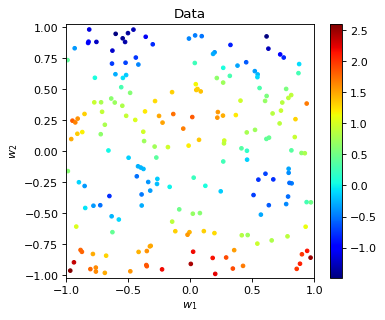

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Data generation -- don't change
np.random.seed(42)
N = 200
w1_data = np.random.uniform(-1,1,N)
w2_data = np.random.uniform(-1,1,N)

L_data = np.cos(4*w1_data) + np.sin(5*w2_data) + 2*w1_data**2 - w2_data/2
# (end of data generation)

plt.figure(figsize=(5,4.2),dpi=80)
plt.scatter(w1_data,w2_data,s=10,c=L_data,cmap="jet")
plt.colorbar()
plt.axis("equal")
plt.xlabel("$w_1$")
plt.ylabel("$w_2$")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title("Data")
plt.show()


## Weighted KNN function

Here, define a function, `weighted_knn(w1, w2, k)`, which takes in a point at [`w1`, `w2`] and a `k` value, and returns the weighted KNN prediction.  

- As in the lecture activity, data is in the variables `w1_data`, `w2_data`, and `L_data`.  

- You can create as many helper functions as you want

- The key difference between unweighted and weighted KNN is summarized below:

**Unweighted KNN**
1. Find the $k$ data points closest to the target point $w$ 
2. Get the output values at each of these points
3. Average these values together: this is the prediction at $w$

**Weighted KNN**
1. Find the $k$ data points closest to the target point $w$ 
2. Compute the proximity of each of these points as $\text{prox}_i = 1/(\text{distance}(w, w_i) + 1e-9)$
3. For each $w_i$, multiply $\text{prox}_i$ by the output value at $w_i$, and divide by the sum of all $k$ proximities
4. Add all $k$ of these results together: this is the prediction at $w$




In [4]:
def weighted_knn(w1, w2, k):
    # YOUR CODE GOES HERE
    
    # Calculate L2 norm 
    L2 = np.square(w1-w1_data) + np.square(w2-w2_data)

    # Calculate distance
    dist = np.sqrt(L2) # (200,)

    # Indicing k nearest neighbors
    indices = np.argpartition(dist, k)[:k]
    
    # Prox 
    prox = [(L2[n]+(1e-9))**-1 for n in indices] # k x 1
    sum = np.sum(prox)

    # Normalize
    wi = prox/sum 

    # y_hat 

    y_hat = np.sum([L_data[n] for n in indices] * wi)

    return y_hat 



## Plotting

Now create 3 plots showing KNN regressor predictions for k values [1, 5, 25].

You should plot a 50x50 grid of points on a grid for `w1` and `w2` values between -1 and 1. Consult the lecture activity for how to do this.

We recommend creating a function, e.g. `plot(k)`, so that you need to rewrite less code.

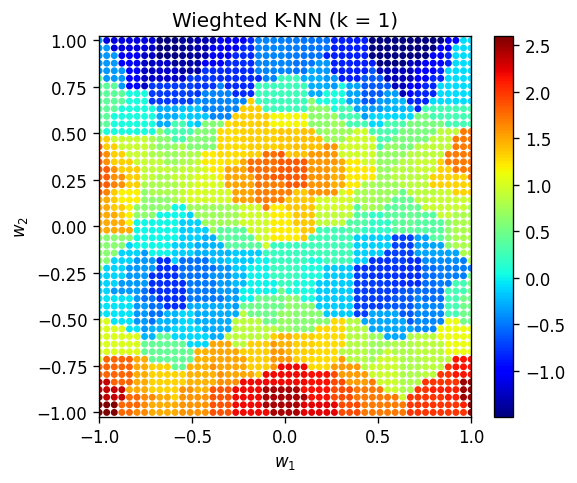

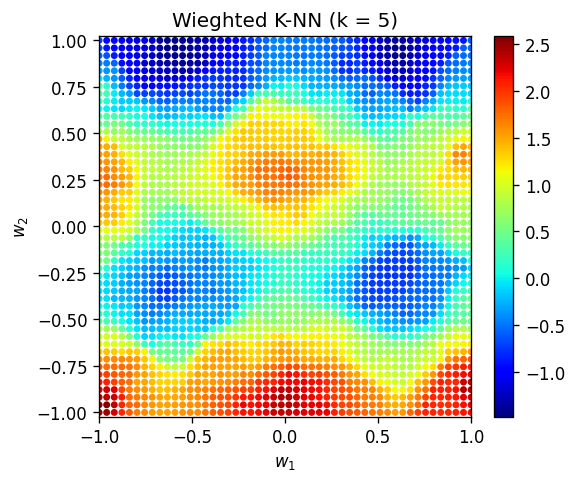

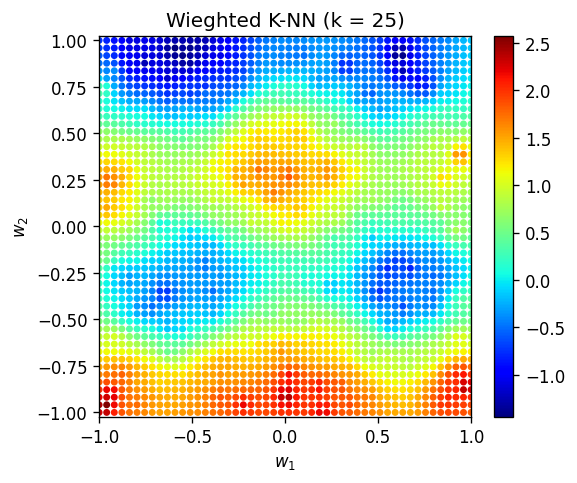

In [6]:
# YOUR CODE GOES HERE
# Visualize results for k = 1, 5, and 25

# create data
k = [1,5,25]
w1_val = np.linspace(-1,1)
w2_val = np.linspace(-1,1)

# build mesh 
w1s, w2s = np.meshgrid(w1_val, w2_val)
w1_flatten, w2_flatten = w1s.flatten(), w2s.flatten()

# def plotting(k):
def plotting(k):

    # calculate knn 
    L_val = np.zeros_like(w1_flatten)
    for i in range(len(L_val)):
        L_val[i] = weighted_knn(w1_flatten[i], w2_flatten[i], k)

    plt.figure(figsize=(5,4.2),dpi=120)
    plt.scatter(w1_flatten,w2_flatten,s=10,c=L_val,cmap="jet")
    plt.colorbar()
    plt.axis("equal")
    plt.xlabel("$w_1$")
    plt.ylabel("$w_2$")
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.title("Wieghted K-NN (k = %d)" % k)


    
# plot
[plotting(n) for n in k];



## Using SciKit-Learn

We can also use sklearn's `KNeighborsRegressor()`, which is a very efficient implementation of KNN regression.

The code to do this has been done for one case below. First, make note of how this is done. 

In [7]:
model = KNeighborsRegressor(n_neighbors = 1, weights="distance")
X = np.vstack([w1_data,w2_data]).T
model.fit(X, L_data)


# Get a prediction at a point (0, 0):
print(model.predict(np.array([[0,0]])))


[1.19743607]


Now create 3 plots for the same values of k as before, using this KNN implementation instead. You can make sure these are visually the same as your from-scratch KNN regressor.

(200, 2)


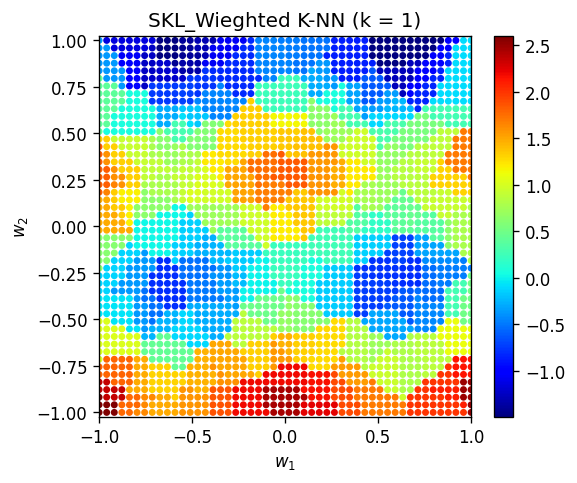

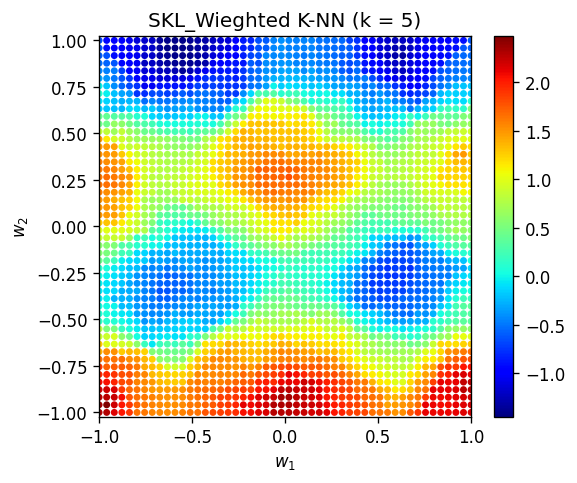

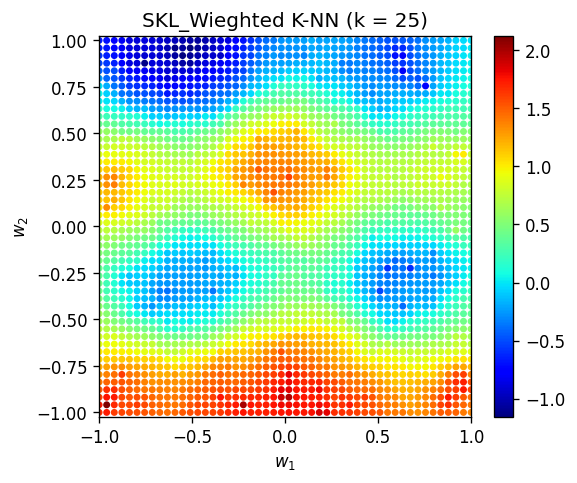

In [8]:
# YOUR CODE GOES HERE
# Visualize sklearn results for k = 1, 5, and 25

# k 
k = [1,5,25]

# W Data
X = np.vstack([w1_data,w2_data]).T
print(X.shape)

# Create data grids
w1_val = np.linspace(-1,1)
w2_val = np.linspace(-1,1)

# build mesh 
w1s, w2s = np.meshgrid(w1_val, w2_val)
w1_flatten, w2_flatten = w1s.flatten(), w2s.flatten()
w_points = np.vstack([w1_flatten, w2_flatten]).T


# KNN fitting
for n in k:
    model = KNeighborsRegressor(n_neighbors = n, weights="distance")
    model.fit(X, L_data) # model.fit(data, label)
    L_hat = model.predict(w_points) # L_hat.shape = (2500,)
    plt.figure(figsize=(5,4.2),dpi=120)
    plt.scatter(w_points[:,0], w_points[:, 1],s=10,c=L_hat,cmap="jet")
    plt.colorbar()
    plt.axis("equal")
    plt.xlabel("$w_1$")
    plt.ylabel("$w_2$")
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.title("SKL_Wieghted K-NN (k = %d)" % n)

